In [1]:
from keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

/home/jorge/.local/share/virtualenvs/RecommenderSystems-c5N1t04d/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data
We load the neural codes for the Caltech101 image data set, obtained from a pre-trained VGG16 network in "Practical-3.3.0_preprocess-caltech101.ipynb".

In [2]:
with open(os.path.join("data","caltech101_VGG16_fc2.p"), "rb") as f:
    X_fc2, y, X_paths, classes = pickle.load(f)

# Nearest Neighbor Classifier
For image search, we can train a simple nearest neighbor classifier from scikit-learn. Here we use the L2-norm (Lp-norm with p=2) as a distance measure between representations.

In [3]:
neigh = NearestNeighbors(n_neighbors=5, p=2)
neigh.fit(X_fc2)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

Let's test it on some images from the dataset itself. For each example input image, we obtain the (L2) distances to its 5 nearest neighbors, as well as the indices of those nearest neighbors.

In [13]:
indices = [1000, 1500, 2000]
X = X_fc2[indices]
nn = neigh.kneighbors(X)
nn  # nn = (distances, indices)

(array([[ 0.        , 53.8435551 , 55.06139716, 57.45153638, 57.92962031],
        [ 0.        , 72.34699916, 72.45180101, 73.10161183, 74.58268621],
        [ 0.        , 24.81492802, 51.34053695, 51.93980791, 53.71912379]]),
 array([[1000,  940,  966,  946,  887],
        [1500, 3947,  479, 3811,  975],
        [2000, 2049, 2031, 2010, 1907]]))

Let's visualise the examples (input images) we chose.

Class: bonsai


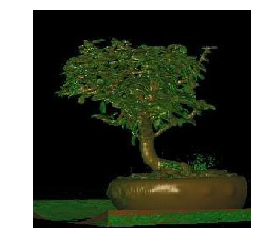

Class: stegosaurus


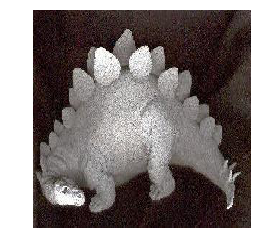

Class: Leopards


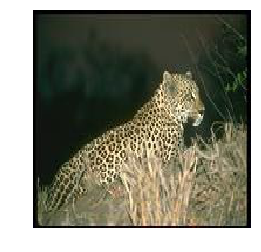

In [5]:
def show_img(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

for i in indices:
    print("Class:", classes[y[i]])
    show_img(X_paths[i])

Now we visualise each of the input images along with their 5 nearest neighbors.

In [27]:
# === add code here ===
def show_images(target, neighbors, image_paths):
    target_path = image_paths[target]
    
    target = image.load_img(target_path, target_size=(224,224))
    fig = plt.figure(figsize=(6,4))
    
    sub1 = fig.add_subplot(231)
    sub1.set_title('Original image')
    sub1.axis("off")
    sub1.imshow(target)
    
    for idx, neighbor in enumerate(neighbors):
        neighbor_path = image_paths[neighbor]
        neighbor_img = image.load_img(neighbor_path, target_size=(224, 224))
        subfigure_number = 232 + idx
        subfigure = fig.add_subplot(subfigure_number)
        subfigure.set_title('Neighbor {}'.format(idx + 1))
        subfigure.axis("off")
        subfigure.imshow(neighbor_img)

    plt.show()

[1000, 1500, 2000]
1000


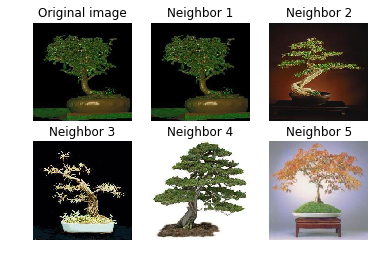

In [28]:
nn_indices = nn[1]
nn_indices

first_image = indices[0]
print(indices)
print(first_image)
first_neighbors = nn_indices[0]
first_image_path = X_paths[first_image]
show_images(first_image, first_neighbors, X_paths)

